In [18]:
# 데이터 준비

import pandas as pd

fish = pd.read_csv('https://bit.ly/fish_csv_data')
fish.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [19]:
# 도미일 확률 72% 빙어일 확률 16% 의 럭키백이 있다고 가정

# 확률을 계산하기 위해 길이(length), 대각선길이(Diagonal), 
# 넓이(width), 높이(height),무게(weight)까지 5개의 특성을 활용

In [20]:
fish_input[:10]

array([[242.    ,  25.4   ,  30.    ,  11.52  ,   4.02  ],
       [290.    ,  26.3   ,  31.2   ,  12.48  ,   4.3056],
       [340.    ,  26.5   ,  31.1   ,  12.3778,   4.6961],
       [363.    ,  29.    ,  33.5   ,  12.73  ,   4.4555],
       [430.    ,  29.    ,  34.    ,  12.444 ,   5.134 ],
       [450.    ,  29.7   ,  34.7   ,  13.6024,   4.9274],
       [500.    ,  29.7   ,  34.5   ,  14.1795,   5.2785],
       [390.    ,  30.    ,  35.    ,  12.67  ,   4.69  ],
       [450.    ,  30.    ,  35.1   ,  14.0049,   4.8438],
       [500.    ,  30.7   ,  36.2   ,  14.2266,   4.9594]])

In [21]:
pd.unique(fish['Species'])

array(['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt'],
      dtype=object)

In [22]:
fish_input = fish[['Weight','Length','Diagonal','Height','Width']].to_numpy()
# 특성값 5개를 넘파이배열로 변환

fish_target = fish['Species'].to_numpy()
# 특성값을 통해 예측할 값의 실제값을 넘파이배열로 변환

In [23]:
# 훈련세트와 테스트세트를 train_test_split로 나누어 넣어줌

from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    fish_input, fish_target, random_state=42)

In [24]:
# 서로 다른 특성값을 표준화시킴

from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [25]:
# k- 최근접 이웃의 다중분류

from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier(n_neighbors=3)
kn.fit(train_scaled, train_target)
# 앞서 k-최근접 이웃에서 도미값과 빙어값을 0 과 1로 변환했었는데
# 굳이 바꾸지 않고 문자열로 넣는다 해도 사이킷런이 정수값으로 변환하기 때문에 문제 없음

print(kn.classes_)
# _의 값은 모델 클래스를 만들때 지정한 값이 아니라 모델이 훈련세트에서부터 추출한 학습값

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


In [26]:
print(kn.predict(test_scaled[:5]))

['Perch' 'Smelt' 'Pike' 'Perch' 'Perch']


In [28]:
import numpy as np

# 확률로 보기 위해선 predict_proba을 사용
proba = kn.predict_proba(test_scaled[:5])
print(np.round(proba, decimals=4))

[[0.     0.     1.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.     1.     0.    ]
 [0.     0.     0.     1.     0.     0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]]


In [29]:
# 로지스틱 회귀

# z = a*무게 + b*길이 + c*대각선 + d*높이 + e*두께 + f
# 각 특성들에 가중치값을 곱하고 절편값(f)를 더하는 것을 보면 선형회귀와 비슷해보임

# 확률 범위 0~1로 바꿔야 하는데
# 이때 사용하는 함수 = sigmoid() (또는 로지스틱 함수라고 함)
# S자 모양의 모습을 띄기 때문에 붙여진 이름이라 함

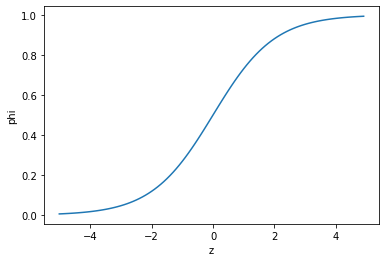

In [31]:
import numpy as np
import matplotlib.pyplot as plt

z = np.arange(-5, 5, 0.1)
phi = 1 / (1 + np.exp(-z))

plt.plot(z, phi)
plt.xlabel('z')
plt.ylabel('phi')
plt.show()

In [30]:
# 시그모이드 함수는 값이 아무리 작아도 0 밑으로 내려가지 않고
# 값이 아무리 커도 1을 넘지 않음
# 0.5를 기준으로 높으면 양성클래스, 낮으면 음성클래스로 분류

# 회귀라는 이름이 붙었지만 분류 알고리즘임
# 선형회귀 방정식을 이용하기 때문에 회귀라는 이름을 붙인 것 같음

In [32]:
# 로지스틱 회귀로 이진 분류

bream_smelt_indexes = (train_target == 'Bream') | (train_target == 'Smelt')
# 도미(Bream)나 빙어(Smelt)인 값만 넣어줌

# 아랫값 또한 도미와 빙어로만 된 훈련셋과 테스트셋으로 값을 넣어줌
train_bream_smelt = train_scaled[bream_smelt_indexes]
target_bream_smelt = train_target[bream_smelt_indexes]

In [33]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(train_bream_smelt, target_bream_smelt)

LogisticRegression()

In [34]:
print(lr.predict(train_bream_smelt[:5]))

['Bream' 'Smelt' 'Bream' 'Bream' 'Bream']


In [35]:
print(lr.predict_proba(train_bream_smelt[:5]))
# 0 = 음성클래스 확률, 1 = 양성클래스 확률
# 도미가 0, 빙어가 1

[[0.99759855 0.00240145]
 [0.02735183 0.97264817]
 [0.99486072 0.00513928]
 [0.98584202 0.01415798]
 [0.99767269 0.00232731]]


In [40]:
print(lr.classes_)

['Bream' 'Smelt']


In [36]:
# 로지스틱 회귀 계수 확인
# coef_ = 가중치
# intercept_ = 절편
print(lr.coef_, lr.intercept_)
# z = -0.4037798*무게  -0.57620209*길이 -0.66280298*대각선 -1.01290277*높이 -0.73168947*두께 -2.16155132(절편)

[[-0.4037798  -0.57620209 -0.66280298 -1.01290277 -0.73168947]] [-2.16155132]


In [37]:
# z 값
decisions = lr.decision_function(train_bream_smelt[:5])
print(decisions)

[-6.02927744  3.57123907 -5.26568906 -4.24321775 -6.0607117 ]


In [39]:
# 위 값을 시그모이드 함수에 넣어서 확률값이 나오는지 확인

from scipy.special import expit

print(expit(decisions))

[0.00240145 0.97264817 0.00513928 0.01415798 0.00232731]


In [41]:
# 위에서 나온 1번 값과 똑가은 것을 알 수 있음

# [[0.99759855 0.00240145]
#  [0.02735183 0.97264817]
#  [0.99486072 0.00513928]
#  [0.98584202 0.01415798]
#  [0.99767269 0.00232731]]

In [42]:
# 로지스틱 회귀로 다중 분류(여러개의 클래스가 있는 경우)

lr = LogisticRegression(C=20, max_iter=1000)
                              # max_iter = 반복횟수 (디폴드 값은 100)
                        # C =  로지스틱회귀는 L2(릿지) 노름 규제 기본적용 
                        # 대문자 C 값을 이용하며 값이 올라가면 규제가 약해지고 값이 내려가면 규제가 강해짐(디폴트 1)
                        # 규제의 역수라고 함
lr.fit(train_scaled, train_target)

print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))
# 훈련점수와 테스트점수의 정확도

0.9327731092436975
0.925


In [45]:
print(lr.predict(test_scaled[:5]))

['Perch' 'Smelt' 'Pike' 'Roach' 'Perch']


In [43]:
proba = lr.predict_proba(test_scaled[:5])
print(np.round(proba, decimals=3))

# 5개의 행(샘플)과 7개의 열(클래스)

[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]


In [44]:
print(lr.coef_.shape, lr.intercept_.shape)

# 5개의 열은 7개의 클래스와 곱해지는 계수
# 각 클래스마다 선형함수가 생김 (이진분류를 7번 실행)

(7, 5) (7,)


In [46]:
print(lr.classes_)

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


In [47]:
# 7개의 선형함수가 시그모이드로 바꾸면 7개의 시그모이드의 합이 1이 되어야 하는데
# 7개의 시그모이드가 1로 나올수가 없기 때문에
# 다중분류일 때엔 시그모이드가 아닌 소프트맥스 함수를 사용

In [48]:
# 5개의 샘플에 대해서 7개의 결정함수(z)값이 출력됨
# 소프트맥스 함수는 각 z값을 지수함수에 적용
# z0~ zN까지 구한 뒤 각각 sum함수로 더한 지수함수 값을 분모로 줌
# 지수함수를 적용한 각각의 값을 전부 더해서 분모로 뿌려줌

decision = lr.decision_function(test_scaled[:5])
print(np.round(decision, decimals=2))

[[ -6.5    1.03   5.16  -2.73   3.34   0.33  -0.63]
 [-10.86   1.93   4.77  -2.4    2.98   7.84  -4.26]
 [ -4.34  -6.23   3.17   6.49   2.36   2.42  -3.87]
 [ -0.68   0.45   2.65  -1.19   3.26  -5.75   1.26]
 [ -6.4   -1.99   5.82  -0.11   3.5   -0.11  -0.71]]


In [49]:
# 소프트맥스 함수

from scipy.special import softmax

# 각 지수값을 계산하는 것을 scipy.special 에서 제공하는 softmax 함수를 이용하면
# 값을 편리하게 구할 수 있음
# 그렇게 구한 값으로 확률을 구함

proba = softmax(decision, axis=1)
print(np.round(proba, decimals=3))
# proba = 확률, decimals= 소숫점 자릿수

[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]
